In [1]:
#!/usr/bin/env python
"""choose_skies.ipynb: a notebook to create and examine GW backgrounds """

__author__ = "Chiara M. F. Mingarelli"
__copyright__ = "Copyright 2016, GWASAP project"
__credits__ = ["Chiara Mingarelli", "Stephen Taylor"]
__license__ = "GPL"
__version__ = "0.0.1"
__maintainer__ = "Chiara Mingarelli"
__email__ = "mingarelli@gmail.com"


In [2]:
#necessary imports
from __future__ import division
from IPython.display import display, Math, Latex
import math
from math import sqrt, cos, sin, pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as ml
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import healpy as hp
import plot_mpl2 as plot
from astropy.io import fits

import AnisCoefficients_pix as cbylm_pix 

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
# plotting preamble (credit J. Ellis)

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

In [4]:
"""NUMBER OF DETECTED SKIES PER RELATION"""
#0.34 dex = 189/116,150 = 0.0016/relatization = 0.16%
#0.51 dex = 43/10,000 = 0.43%
#0.68 dex = 96/10,000 = 0.96%
#1.02 dex = 258/10,000 = 2.58%

'NUMBER OF DETECTED SKIES PER RELATION'

In [5]:
freq_choice = np.loadtxt("../gw_freqs1.dat") #available GW frequencies

In [6]:
#gets data from the final skies (generated in step 3)
final_file = np.genfromtxt("../../detectedSkies/final_skies/mm13_mbul_final_test0126.txt")
final_galname = np.genfromtxt("../../detectedSkies/final_skies/mm13_mbul_final_test0126.txt", usecols = 2, dtype='str')
final_filename = np.genfromtxt("../../detectedSkies/final_skies/mm13_mbul_final_test0126.txt", usecols = -1, dtype='str')
final_size = len(final_file)
final_RA = final_file[:,0]/180*pi
final_DEC = final_file[:,1]/180*pi
final_strain = final_file[:,8]

print(final_size)

23


In [7]:
final_RA

array([5.3411613 , 4.88973189, 4.33073783, 1.98655121, 4.32293621,
       5.3411613 , 1.97452589, 5.86484734, 4.83585357, 4.89095362,
       4.33073783, 5.3411613 , 4.06197458, 1.39446571, 3.25242106,
       5.85606833, 0.88442815, 0.42467351, 5.3411613 , 5.3411613 ,
       5.3411613 , 5.3411613 , 5.3411613 ])

In [8]:
#finds the loudest source from all the detectable sources from final skies
loudest_index = int(final_strain.argmax())
loudest_galname = final_galname[loudest_index]
loudest_filename = int(final_filename[loudest_index])

print(loudest_index)
print(loudest_galname)
print(loudest_filename)

16
NGC1316
1140


In [76]:
#collects all data from the final skies
data_filename = '../../detectedSkies/final_skies/all_final_sky_data_new0126.txt'


count = 0 #variable used to count number of sources per realization
file_s = [] #numbers of sources per relaization
RA_tot_all = []
DEC_tot_all = []
freq_tot_all = []
strain_tot_all = []


#temps used to help seperate data by relalization
temp_RA = []
temp_DEC = []
temp_freq = []
temp_strain = []
temp_file_s = []

with open(data_filename) as f:
    
    temp_RA = []
    temp_DEC = []
    temp_freq = []
    temp_strain = []
    
    for line in f:
        if len(line) < 50:
            
            #add the collected data to the real lists
            
            file_s.append(count)
            RA_tot_all.append(temp_RA) #phi, add pi to this for healpix maps
            DEC_tot_all.append(temp_DEC) #theta
            freq_tot_all.append(temp_freq)
            strain_tot_all.append(temp_strain)

            
            #reset the temp lists
            
            temp_RA = []
            temp_DEC = []
            temp_freq = []
            temp_strain = []
            count = 0
            
        else:
            
            #data is split into its corresponding lists
            
            splitted = line.split(" ") 
    
            temp_RA.append(float(splitted[0])) #phi, add pi to this for healpix maps
            temp_DEC.append(float(splitted[1])) #theta
            temp_freq.append(float(splitted[7]))
            temp_strain.append(float(splitted[8]))
            count+=1
            
            

In [77]:
# all data from the sky with the loudest source (overall)

RA_loudest_sky = RA_tot_all[loudest_index] #phi, add pi to this for healpix maps
DEC_loudest_sky = DEC_tot_all[loudest_index] #theta
freq_loudest_sky = freq_tot_all[loudest_index]
strain_loudest_sky = strain_tot_all[loudest_index]
file_size_loudest_sky = file_s[loudest_index] # number of galaxies in file



In [78]:
#find index of loudest source overall for this sky
source_index = strain_loudest_sky.index(max(strain_loudest_sky))
source_RA = RA_loudest_sky[source_index]
source_DEC = DEC_loudest_sky[source_index]

In [79]:
#remove loudest source from the source sky to produce noise vectors

RA_loudest_noise = RA_loudest_sky.copy() #phi, add pi to this for healpix maps
DEC_loudest_noise = DEC_loudest_sky.copy() #theta
freq_loudest_noise = freq_loudest_sky.copy()
strain_loudest_noise = strain_loudest_sky.copy()
file_size_loudest_noise = file_size_loudest_sky # number of galaxies in file

RA_loudest_noise.pop(source_index) #phi, add pi to this for healpix maps
DEC_loudest_noise.pop(source_index) #theta
freq_loudest_noise.pop(source_index)
strain_loudest_noise.pop(source_index)
file_size_loudest_noise = file_size_loudest_noise - 1

#del RA_loudest_noise[source_index]

In [80]:
len(RA_loudest_noise)

95

In [81]:
# all data from a random source sky

rand_index = 5 #random num

RA_random = RA_tot_all[rand_index] #phi, add pi to this for healpix maps
DEC_random = DEC_tot_all[rand_index] #theta
freq_random = freq_tot_all[rand_index]
strain_random = strain_tot_all[rand_index]
file_s_random = file_s[rand_index] # number of galaxies in file

#find index of loudest source overall for this sky

source_index_random = strain_random.index(max(strain_random))
source_RA_random = RA_random[source_index]
source_DEC_random = DEC_random[source_index]

# remove loudest from the source sky

RA_random_noise = RA_random #phi, add pi to this for healpix maps
DEC_random_noise = DEC_random #theta
freq_random_noise = freq_random
strain_random_noise = strain_random
file_size_random_noise = file_s_random # number of galaxies in file

RA_random_noise.pop(source_index_random) #phi, add pi to this for healpix maps
DEC_random_noise.pop(source_index_random) #theta
freq_random_noise.pop(source_index_random)
strain_random_noise.pop(source_index_random)
file_size_random_noise = file_size_random_noise - 1


In [82]:
# A map of the sky realization where the detection was made

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


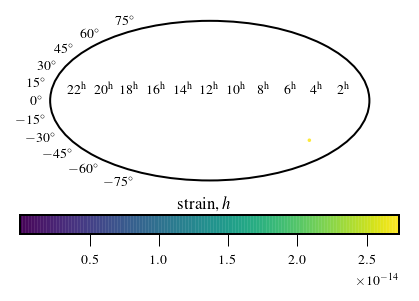

In [83]:
#PLOTS SKY FOR LOUDEST SKY ONLY
ax = plt.subplot(111, projection='astro mollweide')

# plot "noise" map (GW sky with 2 loud sources removed)
#ax.grid()
#plot.outline_text(ax)
maxstrain = np.amax(strain_loudest_sky)
colors = (strain_loudest_sky) # make colors vary with respect to strain
area = pi * (5*strain_loudest_sky/maxstrain)**2  # adapt circles with 0 to 15 point radii

# labels
plt.suptitle(r'strain, $h$', y=0.3)
sc = plt.scatter(RA_loudest_sky, DEC_loudest_sky, c = colors, cmap = 'viridis', alpha = 0.9, edgecolors='none',s=area)

#comment out when doing random sky
#plt.scatter(source_RA, source_DEC, color ='yellow', marker = '*', s=80,edgecolor = "black", lw=0.2)

plt.colorbar(sc, orientation = 'horizontal')
#plt.savefig("plots_mm13_34/step_4/"+str(loudest_galname)+" _mapWsource.pdf")
#plt.savefig("plots_mm13_34/step_4/random_mapWsource.pdf")

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


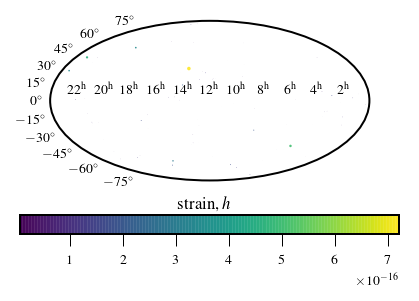

In [84]:
#PLOTS SKY FOR RANDOM SKY 
ax = plt.subplot(111, projection='astro mollweide')

# plot "noise" map (GW sky with 2 loud sources removed)
#ax.grid()
#plot.outline_text(ax)
maxstrain = np.amax(strain_random)
colors = (strain_random) # make colors vary with respect to strain
area = pi * (5*strain_random/maxstrain)**2  # adapt circles with 0 to 15 point radii

# labels
plt.suptitle(r'strain, $h$', y=0.3)
sc = plt.scatter(RA_random, DEC_random, c = colors, cmap = 'viridis', alpha = 0.9, edgecolors='none',s=area)

#comment out when doing random sky
#plt.scatter(source_RA, source_DEC, color ='yellow', marker = '*', s=80,edgecolor = "black", lw=0.2)

plt.colorbar(sc, orientation = 'horizontal')
#plt.savefig("plots_mm13_34/step_4/"+str(loudest_galname)+" _mapWsource.pdf")
#plt.savefig("plots_mm13_34/step_4/random_mapWsource.pdf")

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


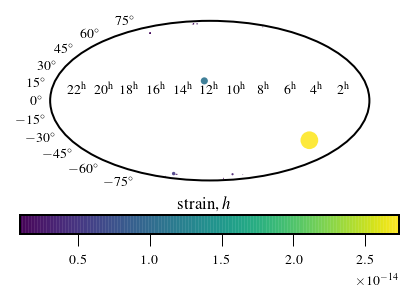

In [85]:
#PLOTS SKY FOR ALL FINAL SKIES
ax = plt.subplot(111, projection='astro mollweide')

# plot "noise" map (GW sky with 2 loud sources removed)
#ax.grid()
#plot.outline_text(ax)
#final_strain_log = np.log10(final_strain)
maxstrain = np.amax(final_strain)
colors = (final_strain) # make colors vary with respect to strain
area = pi * (5*final_strain/maxstrain)**2  # adapt circles with 0 to 15 point radii

# labels
plt.suptitle(r'strain, $h$', y=0.3)
sc = plt.scatter(final_RA, final_DEC, c = colors, cmap = 'viridis', alpha = 0.9, edgecolors='none',s=area)

plt.colorbar(sc, orientation = 'horizontal')
#plt.savefig("plots_mm13_34/step_4/all_final_map_34.pdf")

In [86]:
# What does the GW background look like from this sky?

In [121]:
def h2_c(hk, fk, deltaF):
    """
    Eq 35 Babak et al. 2016; 
    Given a sky of strains at certain frequencies,
    what is it in terms of a GW background?
    returns h^2_c
    """
    h2k = np.square(hk)
    ans = h2k*fk/deltaF
    return ans


def pol2cart(lon, lat): 
    """ 
    Utility function to convert longitude,latitude on a unit sphere to 
    cartesian co-ordinates.

    """ 

    x = np.cos(lat)*np.cos(lon) 
    y = np.cos(lat)*np.sin(lon) 
    z = np.sin(lat) 

    return np.array([x,y,z])


def greedy_bin_sky(skypos, skycarts, weights=None):
    """

    Greedy binning algorithm

    """

    N = len(skycarts) 
    skycarts = np.array(skycarts)
    bins = np.zeros(N)
    ct = 0
    for raSample, decSample in skypos: 
        sampcart = pol2cart(raSample, decSample) 
        dx = np.dot(skycarts, sampcart)
        maxdx = np.argmax(dx)

        if weights is not None:
            bins[maxdx] += weights[ct]
        else:
            bins[maxdx] += 1

        ct += 1

    # fill in skymap
    histIndices = np.argsort(bins)[::-1]    # in decreasing order
    NSamples = len(skypos)

    frac = 0.0
    skymap = np.zeros(N)
    for i in histIndices:
        frac = float(bins[i]) # /float(NSamples) 
        skymap[i] = frac

    return skymap


def plotSkyMap(raSample, decSample, nside=64, contours=None, colorbar=True, \
              inj=None, weights=None, psrs=None):
    """

    Plot Skymap of chain samples on Mollwiede projection.

    @param raSample: Array of right ascension samples
    @param decSample: Array of declination  samples
    @param nside: Number of pixels across equator [default = 64]
    @param contours: Confidence contours to draw eg. 68%, 95% etc
                     By default this is set to none and no contours
                     will be drawn.
    @param colorbar: Boolean option to draw colorbar [default = True]
    @param inj: list of injected values [ra, dec] in radians to plot
                [default = None]
    @param weights: sample weights [default = None]
    @param psrs: Stacked array of pulsar sky locations [ra, dec] in radians
                 [default=None] Will plot as white diamonds

    """

    # clear figures
    plt.clf()

    # create stacked array of ra and dec
    skypos = np.column_stack([raSample, decSample])

    npix = hp.nside2npix(nside)    # number of pixels total


    # initialize theta and phi map coordinantes
    skycarts=[]
    for ii in range(npix):
        skycarts.append(np.array(hp.pix2vec(nside,ii)))

    # get skymap values from greedy binning algorithm
    skymap = greedy_bin_sky(skypos, skycarts, weights)

    """SMOOTHING"""
    # smooth skymap (ON for sky maps/ OFF for cl)
    #skymap = hp.smoothing(skymap, 0.1) 

    # make plot
    ax = plt.subplot(111, projection='astro mollweide')

    # plot map
    #ax.grid()
    #plot.outline_text(ax)
    plot.healpix_heatmap(skymap, cmap = 'viridis')

    return skymap
    # save skymap
    #plt.savefig('skymap.pdf', bbox_inches='tight')

In [122]:
T = 315360000*2.5 # 25 years in seconds, consistent with EPTA data
dF = 1/T

In [123]:
#use random
hc_strain_loudest_noise = np.sqrt(h2_c(strain_loudest_noise, freq_loudest_noise, dF))
hc_strain_loudest = np.sqrt(h2_c(strain_loudest_sky, freq_loudest_sky, dF))
hc_strain_random = np.sqrt(h2_c(strain_random, freq_random, dF))
hc_strain_random_noise = np.sqrt(h2_c(strain_random_noise, freq_random_noise, dF))




In [124]:
"""TURN ON SMOOTHING"""

'TURN ON SMOOTHING'

In [125]:
hc_strain_loudest_noiseLog = np.log10(hc_strain_loudest_noise)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


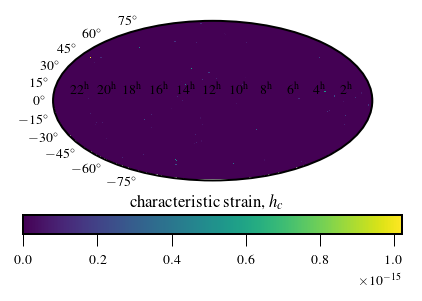

In [126]:
#plot random sky all points with source
hpskymap_all = plotSkyMap(RA_random, DEC_random, weights = hc_strain_random)
plt.suptitle(r'characteristic strain, $h_c$', y=0.3)
plt.colorbar(orientation='horizontal')
#plt.savefig('plots_mm13_34/step_4/random_w_all.pdf', bbox_inches='tight')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


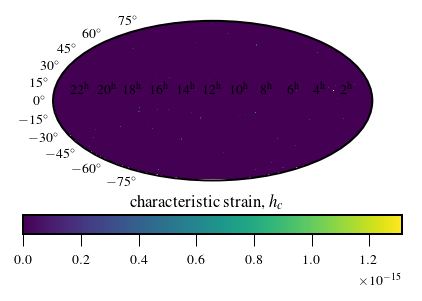

In [127]:
#TURN ON SMOITH
#loudest sky with only noise, no source
#DONT RUN FOR RANDOM EXAMPLE
hpskymap_noise = plotSkyMap(RA_loudest_noise, DEC_loudest_noise, weights = hc_strain_loudest_noise)
plt.suptitle(r'characteristic strain, $h_c$', y=0.3)
plt.colorbar( orientation='horizontal')
#plt.savefig('plots_mm13_34/step_4/'+str(loudest_galname)+'_only_noise.pdf', bbox_inches='tight')

In [128]:
hp.pixelfunc.remove_monopole(hpskymap_all)

monopole: 2.6144e-19


array([-2.61440317e-19, -2.61440317e-19, -2.61440317e-19, ...,
       -2.61440317e-19, -2.61440317e-19, -2.61440317e-19])

In [129]:
# create alm map form healpix map
alm_map_noise = hp.map2alm(hpskymap_noise,lmax=10)
alm_map_all = hp.map2alm(hpskymap_all,lmax=10)

# make a map in terms of \ell from the alm map
hpskymap_lmax_noise = hp.alm2map(alm_map_noise,nside=64)
hpskymap_lmax_all = hp.alm2map(alm_map_all,nside=64)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [130]:
hpskymap_lmax_noise

array([1.23302471e-19, 7.32262057e-20, 6.56934049e-20, ...,
       2.43413486e-19, 2.67230057e-19, 2.63873496e-19])

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


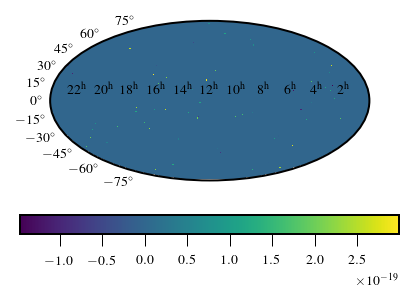

In [131]:
#loudest sky WITH source
plotSkyMap(RA_loudest_sky, DEC_loudest_sky, weights = hpskymap_lmax_noise)
plt.colorbar(orientation='horizontal')
#plt.savefig('plots_mm13_34/step_4/'+str(loudest_galname)+'_skymap.pdf', bbox_inches='tight')

In [132]:
hpskymap_lmax_noise[hpskymap_lmax_noise < 0.0] = 0.0
hpskymap_lmax_all[hpskymap_lmax_all < 0.0] = 0.0

In [133]:
len(DEC_loudest_sky)

96

In [134]:
# What does this sky look like in terms of an anisotropic background?

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


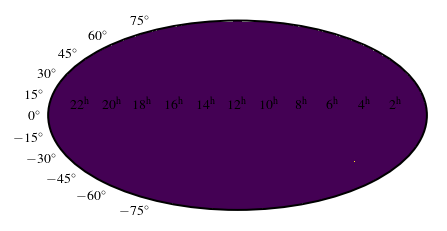

In [135]:
# h^2_c for C_l decomposition

hpskymap2_noise = plotSkyMap(RA_loudest_noise, DEC_loudest_noise , weights = hc_strain_loudest_noise**2)
hpskymap2_all = plotSkyMap(RA_loudest_sky, DEC_loudest_sky, weights = hc_strain_loudest**2)

# create alm map form healpix map

alm_map2_noise = hp.map2alm(hpskymap2_noise,lmax=10)
alm_map2_all = hp.map2alm(hpskymap2_all,lmax=10)

# make a map in terms of \ell from the alm map

hpskymap_lmax2_noise = hp.alm2map(alm_map2_noise,nside=64)
hpskymap_lmax2_all = hp.alm2map(alm_map2_all,nside=64)


In [136]:
"""TURN OFF SMOOTHING"""

'TURN OFF SMOOTHING'

In [137]:
## Decompose this onto real spherical harmonics with our standard normalisations
lmax = 50

clm_noise = cbylm_pix.clmFromMap_fast(hpskymap2_noise, lmax)
clm_all = cbylm_pix.clmFromMap_fast(hpskymap2_all, lmax)

In [138]:
## Make the angular power spectrum, Cl = \sum_m |clm|^2 / (2l+1)

Cl_all = np.zeros(lmax+1)
for ll in range(0,lmax+1):
    Cl_all[ll] = np.sum(clm_all[ll**2:(ll+1)**2]**2.0) / (2.0*ll+1.0) / (4.0*pi)

In [139]:
## Make the angular power spectrum, Cl = \sum_m |clm|^2 / (2l+1)

Cl_noise = np.zeros(lmax+1)
for ll in range(0,lmax+1):
    Cl_noise[ll] = np.sum(clm_noise[ll**2:(ll+1)**2]**2.0) / (2.0*ll+1.0) / (4.0*pi)

(0, 50)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


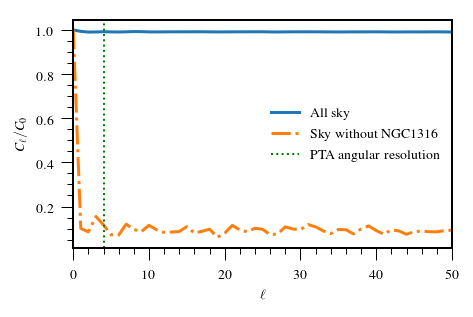

In [140]:
## Let's take a look

fig, ax = plt.subplots() 
ax.plot(np.arange(0,lmax+1),Cl_all/Cl_all[0], label = "All sky",  lw=1.5)
ax.plot(np.arange(0,lmax+1),Cl_noise/Cl_noise[0], label = "Sky without "+str(loudest_galname), lw=1.5,linestyle = '-.')
ax.set_xlabel('$\ell$')
ax.set_ylabel('$C_\ell/C_{0}$')
ax.minorticks_on()
plt.axvline(x=4, ymin=0, ymax = 1, linewidth=1.0, linestyle =":", label = "PTA angular resolution", c='g')
ax.legend(loc='best',frameon=False)
plt.xlim(0,50)
#plt.savefig('plots_mm13_34/step_4/Cl_'+str(loudest_galname)+'_wLimit_SMOOTH.pdf', bbox_inches='tight')

In [ ]:
2400/75000

In [ ]:
550/10000

In [ ]:
800/10000

In [ ]:
1100/10000